In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import missingno as msno

In [200]:
df = pd.read_csv('Diabetes.csv')
label = df.pop("Outcome")


In [201]:
df.head()
n = df.shape[0]
n
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


<AxesSubplot:>

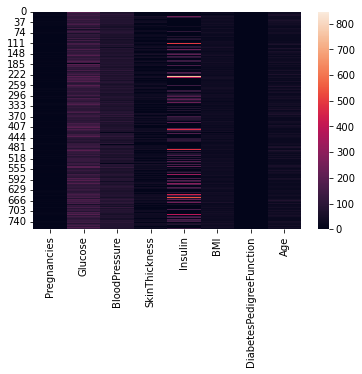

In [202]:
# label.head()
# data  = df.to_numpy()
sns.heatmap(df)


In [203]:
from sklearn.preprocessing import StandardScaler as SS

In [204]:
data = SS().fit_transform(df)

In [205]:
cov_mat = np.matmul(data.T,data)/(n-1)

In [206]:
cov_mat

array([[ 1.00130378,  0.12962746,  0.14146618, -0.08177826, -0.07363049,
         0.01770615, -0.03356638,  0.54505093],
       [ 0.12962746,  1.00130378,  0.15278853,  0.05740263,  0.33178913,
         0.2213593 ,  0.13751636,  0.26385788],
       [ 0.14146618,  0.15278853,  1.00130378,  0.2076409 ,  0.08904933,
         0.2821727 ,  0.04131875,  0.23984024],
       [-0.08177826,  0.05740263,  0.2076409 ,  1.00130378,  0.43735204,
         0.39308503,  0.18416737, -0.11411885],
       [-0.07363049,  0.33178913,  0.08904933,  0.43735204,  1.00130378,
         0.19811702,  0.18531222, -0.04221793],
       [ 0.01770615,  0.2213593 ,  0.2821727 ,  0.39308503,  0.19811702,
         1.00130378,  0.14083033,  0.03628912],
       [-0.03356638,  0.13751636,  0.04131875,  0.18416737,  0.18531222,
         0.14083033,  1.00130378,  0.03360507],
       [ 0.54505093,  0.26385788,  0.23984024, -0.11411885, -0.04221793,
         0.03628912,  0.03360507,  1.00130378]])

In [207]:
from scipy.linalg import eigh
val,vec  = eigh(cov_mat,eigvals=(6,7))
print(val)
print(vec)

[1.73346726 2.09711056]
[[-0.59378583 -0.1284321 ]
 [-0.17402908 -0.39308257]
 [-0.18389207 -0.36000261]
 [ 0.33196534 -0.43982428]
 [ 0.25078106 -0.43502617]
 [ 0.1009598  -0.45194134]
 [ 0.122069   -0.27061144]
 [-0.62058853 -0.19802707]]


In [208]:
print (data.shape)
print (vec.shape)
new_cord = np.matmul(data , vec)
new_cord.shape

(768, 8)
(8, 2)


(768, 2)

In [209]:
new_cord = np.column_stack((new_cord, label))

In [210]:
new_cord

array([[-1.23489499, -1.06850273,  1.        ],
       [ 0.73385167,  1.12168331,  0.        ],
       [-1.59587594,  0.39647671,  1.        ],
       ...,
       [-0.09706503,  0.28347525,  0.        ],
       [-0.83706234,  1.06032431,  1.        ],
       [ 1.15175485,  0.83989172,  0.        ]])

In [211]:
df = pd.DataFrame(new_cord,columns = ['1st_pc','2nd_pc','label'])
df

,1st_pc,2nd_pc,label
0,-1.234895,-1.068503,1.0
1,0.733852,1.121683,0.0
2,-1.595876,0.396477,1.0
3,1.271241,1.115781,0.0
4,2.184819,-2.359334,1.0
...,...,...,...
763,-1.923150,-1.562085,0.0
764,0.614181,0.100405,0.0
765,-0.097065,0.283475,0.0
766,-0.837062,1.060324,1.0


In [ ]:
import matplotlib.pyplot as _plt


C:\Users\Public\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


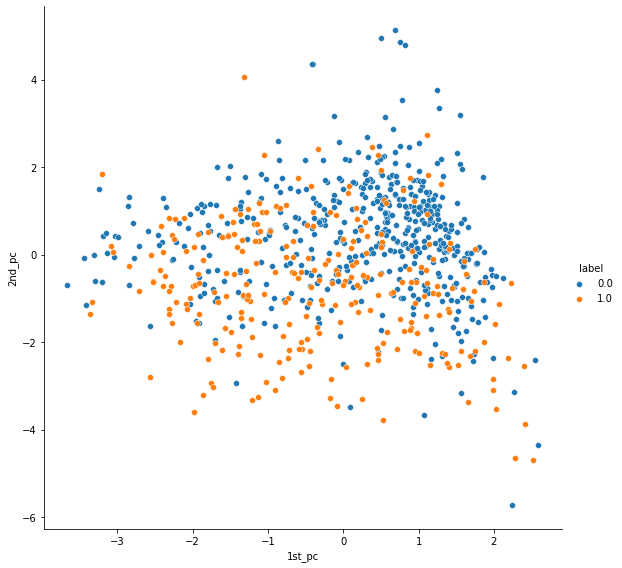

In [225]:
import seaborn as sns
g = sns.FacetGrid(df,hue="label",size=8)
g.map_dataframe(sns.scatterplot,'1st_pc','2nd_pc').add_legend()